# Google Driveのマウントとワークディレクトリへの移動

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Master/research/model/
!ls

Mounted at /content/drive
/content/drive/MyDrive/Master/research/model
best_model.pth			       UI-ProtoMF_model.keras
I-ProtoMF_model.keras		       U-ProtoMF_model.keras
item_proto_ml-1m_1e_38210573_38135658  user_item_proto_ml-1m_34_38210573_3769f13c
item_proto_ml-1m_1e_38210573_9222eb22  user_item_proto_ml-1m_34_38210573_3dcadb68
item_proto_ml-1m_1e_38210573_96cf0f66  user_proto_ml-1m_5a_38210573_a3c49bfc
item_proto_ml-1m_1e_38210573_a26b9f1a  user_proto_ml-1m_5a_38210573_ac353a9e
MFmodel.h5			       user_proto_ml-1m_5a_38210573_b6ce9068
MFmodel.keras


In [ ]:
%cd /content/drive/MyDrive/Master/research/model/user_proto_ml-1m_5a_38210573_ac353a9e
!ls

/content/drive/MyDrive/Master/research/model/user_proto_ml-1m_5a_38210573_ac353a9e
best_model.pth


## パッケージの更新

In [ ]:
# scilit-learnをアップデート
!pip install -U scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)
# 1.5.2

1.5.2


# 学習済みモデルから各重みの取得

In [ ]:
import torch

# モデルの重みをロード
model_path = 'best_model.pth'
state_dict = torch.load(model_path, weights_only=True)

# state_dict の中身を確認
print("State dict keys:", state_dict.keys())

# state_dict の中身（例：重み）を確認
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")


State dict keys: odict_keys(['user_feature_extractor.prototypes', 'user_feature_extractor.embedding_ext.embedding_layer.weight', 'item_feature_extractor.embedding_layer.weight'])
user_feature_extractor.prototypes: torch.Size([36, 17])
user_feature_extractor.embedding_ext.embedding_layer.weight: torch.Size([6034, 17])
item_feature_extractor.embedding_layer.weight: torch.Size([3125, 36])


In [ ]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()

# ユーザーとアイテムのプロトタイプ（プロトタイプ空間）
user_prototypes = state_dict['user_feature_extractor.prototypes'].cpu().detach().numpy()


objects = user_embeddings
prototypes = user_prototypes # 必要に応じてitem_prototypesなどに変更

## UI-ProtoMF

In [ ]:
%cd /content/drive/MyDrive/Master/research/model/user_item_proto_ml-1m_34_38210573_3dcadb68/

/content/drive/MyDrive/Master/research/model/user_item_proto_ml-1m_34_38210573_3dcadb68


In [ ]:
import torch

# モデルの重みをロード
model_path = 'best_model.pth'
state_dict = torch.load(model_path, weights_only=True)

# state_dict の中身を確認
print("State dict keys:", state_dict.keys())

# state_dict の中身（例：重み）を確認
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")

State dict keys: odict_keys(['user_feature_extractor.model_1.prototypes', 'user_feature_extractor.model_1.embedding_ext.embedding_layer.weight', 'user_feature_extractor.model_2.embedding_layer.weight', 'user_feature_extractor.model_2.linear_layer.weight', 'item_feature_extractor.model_1.prototypes', 'item_feature_extractor.model_1.embedding_ext.embedding_layer.weight', 'item_feature_extractor.model_2.embedding_layer.weight', 'item_feature_extractor.model_2.linear_layer.weight'])
user_feature_extractor.model_1.prototypes: torch.Size([36, 55])
user_feature_extractor.model_1.embedding_ext.embedding_layer.weight: torch.Size([6034, 55])
user_feature_extractor.model_2.embedding_layer.weight: torch.Size([6034, 55])
user_feature_extractor.model_2.linear_layer.weight: torch.Size([68, 55])
item_feature_extractor.model_1.prototypes: torch.Size([68, 55])
item_feature_extractor.model_1.embedding_ext.embedding_layer.weight: torch.Size([3125, 55])
item_feature_extractor.model_2.embedding_layer.weight

In [ ]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.model_1.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.model_1.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# ユーザーとアイテムのプロトタイプ（プロトタイプ空間）
user_prototypes = state_dict['user_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
item_prototypes = state_dict['item_feature_extractor.model_1.prototypes'].cpu().detach().numpy()

# T-SNEでの可視化

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

def tsne_plot(objects: np.ndarray, prototypes: np.ndarray, object_legend_text: str = 'Object', perplexity: int = 5,
              path_save_fig: str = None):
    """
    Creates a TSNE plot to visualize the object embeddings and the prototypes in the same space.
    """
    tsne = TSNE(perplexity=perplexity, metric='cosine', init='pca', learning_rate='auto', random_state=42)

    tsne_results = tsne.fit_transform(np.vstack([prototypes, objects]))
    tsne_protos = tsne_results[:len(prototypes)]
    tsne_embeds = tsne_results[len(prototypes):]

    plt.figure(figsize=(6, 6), dpi=100)
    plt.scatter(tsne_embeds[:, 0], tsne_embeds[:, 1], s=10, alpha=0.6, c='#74add1', label=object_legend_text)
    plt.scatter(tsne_protos[:, 0], tsne_protos[:, 1], s=30, c='#d73027', alpha=0.9, label='Prototypes')

    plt.axis('off')
    plt.tight_layout()
    plt.legend(loc="upper left", prop={'size': 13})
    if path_save_fig:
        plt.savefig(path_save_fig, format='pdf')
    plt.show()


/content/drive/MyDrive/Master/research/results


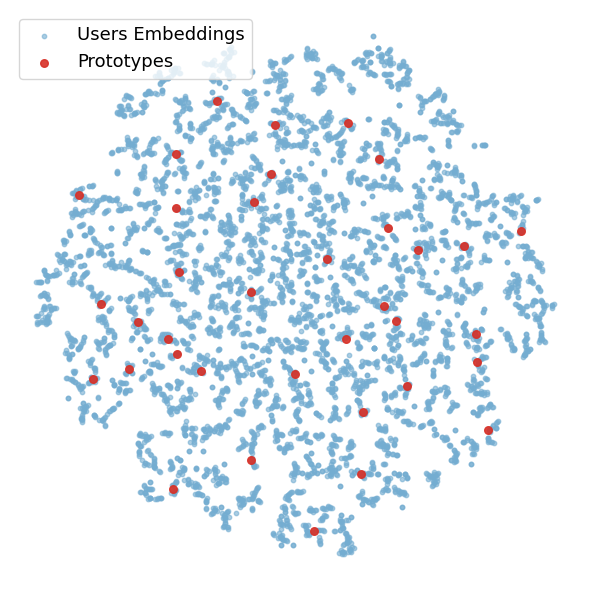

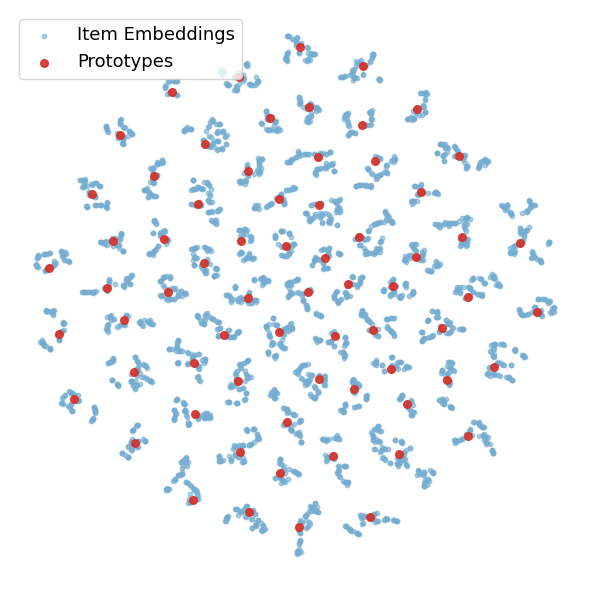

In [ ]:
# T-SNE プロットの実行
# 結果保存ディレクトリへ移動
%cd /content/drive/MyDrive/Master/research/results/
tsne_plot(objects=user_embeddings, prototypes=user_prototypes, object_legend_text='Users Embeddings', perplexity=5, path_save_fig='tsne_users_and_prototypes.pdf')

tsne_plot(objects=item_embeddings, prototypes=item_prototypes, object_legend_text='Item Embeddings', perplexity=5, path_save_fig='tsne_item_and_prototypes.pdf')

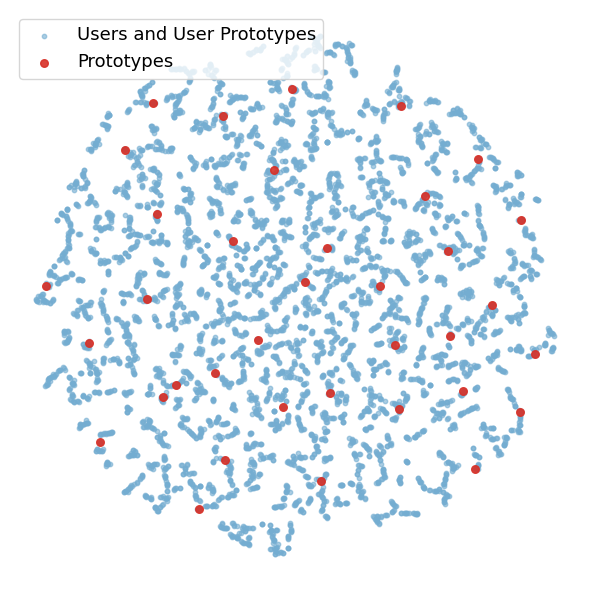

In [ ]:
# T-SNE プロットの実行
tsne_plot(objects, prototypes, object_legend_text='Users and User Prototypes', perplexity=5, path_save_fig='tsne_users_and_prototypes.pdf')

# 上位アイテムの取得

In [ ]:
def get_top_k_items(item_weights: np.ndarray, items_info: pd.DataFrame, proto_idx: int,
                    top_k: int = 5, invert: bool = False):
    """
    Used to generate the recommendations to a user prototype or find the closest items to an item prototypes (depending
    on what item_weights encodes). In the ProtoMF paper, we use the **item-to-item-prototype similarity matrix** as
    item_weights when interpreting the item prototypes. We use the **list of all item embeddings** as item_weights when
    interpreting the user prototypes (this corresponds in finding the recommendations for a user which is maximally
    close to a specific user prototype a maximally distant from all the others).
    :param item_weights: Vector having, for each item, a value for each prototype. Shape is (n_items, n_prototypes)
    :param items_info: a dataframe which contains the item_id field used to look up the item information
    :param proto_idx: index of the prototype
    :param top_k: number of items to return for the prototype, default to 10
    :param invert: whether to look for the farthest items instead of closest, default to false
    :return: a DataFrame containing the top-k closest items to the prototype along with an item weight field.
    """
    assert proto_idx < item_weights.shape[1], \
        f'proto_idx {proto_idx} is too high compared to the number of available prototype'

    weights_proto = item_weights[:, proto_idx]

    top_k_indexes = np.argsort(weights_proto if invert else -weights_proto)[:top_k]
    top_k_weights = weights_proto[top_k_indexes]

    item_infos_top_k = items_info.set_index('item_id').loc[top_k_indexes]
    item_infos_top_k['item weight'] = top_k_weights
    return item_infos_top_k

In [ ]:
%cd /content/drive/MyDrive/Master/research/model/item_proto_ml-1m_1e_38210573_96cf0f66/

/content/drive/MyDrive/Master/research/model/item_proto_ml-1m_1e_38210573_96cf0f66


In [ ]:
import torch

# モデルの重みをロード
model_path = 'best_model.pth'
state_dict = torch.load(model_path, weights_only=True)

# state_dict の中身を確認
print("State dict keys:", state_dict.keys())

# state_dict の中身（例：重み）を確認
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")

State dict keys: odict_keys(['user_feature_extractor.embedding_layer.weight', 'item_feature_extractor.prototypes', 'item_feature_extractor.embedding_ext.embedding_layer.weight'])
user_feature_extractor.embedding_layer.weight: torch.Size([6034, 36])
item_feature_extractor.prototypes: torch.Size([36, 17])
item_feature_extractor.embedding_ext.embedding_layer.weight: torch.Size([3125, 17])


In [ ]:
item_embeddings = state_dict['item_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()
item_prototypes = state_dict['item_feature_extractor.prototypes'].cpu().detach().numpy()

In [ ]:
import pandas as pd

# movies.datを読み込んでitems_infoデータフレームを作成
file_path = '/content/drive/MyDrive/Master/research/data/ml-1m/movies.dat'
items_info = pd.read_csv(file_path, sep='::', engine='python', names=['item_id', 'title', 'genres'], encoding='ISO-8859-1')

# ランダムに3つのプロトタイプインデックスを選択(例: 0番目のプロトタイプに対するアイテムの推奨)
random_proto_idxs = np.random.choice(user_prototypes.shape[1], 3, replace=False)


# 各プロトタイプインデックスに対して、トップKアイテムを取得
top_k_results = []
top_k = 5  # 取得するアイテム数

for proto_idx in random_proto_idxs:
    top_k_items = get_top_k_items(item_weights=item_embeddings, items_info=items_info, proto_idx=proto_idx, top_k=top_k, invert=False)
    top_k_items['prototype_index'] = proto_idx  # プロトタイプインデックスを追加
    top_k_results.append(top_k_items)

# 結果を表示
# リストをDataFrameに変換
top_k_df = pd.concat(top_k_results)

# プロトタイプごとの列を作成（optional）
top_k_df = top_k_df.reset_index()

# 表を表示
import IPython.display as display
display.display(top_k_df)

,item_id,title,genres,item weight,prototype_index
0,246,Hoop Dreams (1994),Documentary,0.324843,12
1,282,Nell (1994),Drama,0.228720,12
2,53,Lamerica (1994),Drama,0.204757,12
3,586,Home Alone (1990),Children's|Comedy,0.161545,12
4,163,Desperado (1995),Action|Romance|Thriller,0.148537,12
5,480,Jurassic Park (1993),Action|Adventure|Sci-Fi,0.270221,5
6,570,"Slingshot, The (Kådisbellan ) (1993)",Comedy|Drama,0.223089,5
7,1224,Henry V (1989),Drama|War,0.208852,5
8,504,No Escape (1994),Action|Sci-Fi,0.197593,5
9,84,Last Summer in the Hamptons (1995),Comedy|Drama,0.195908,5


# 重み可視化

In [ ]:
def weight_visualization(u_sim_mtx: np.ndarray, u_proj: np.ndarray, i_sim_mtx: np.ndarray, i_proj: np.ndarray,
                         annotate_top_k: int = 3):
    """
    Creates weight visualization plots which is used to explain the recommendation of ProtoMF
    :param u_sim_mtx,...,i_proj: vectors that are obtained by the UI-PROTOMF model given the user and item pair.
    :param annotate_top_k: how many of the highest logits need to be annotated
    """

    rescale = lambda y: 1 - ((y + np.max(y)) / (np.max(y) * 2))

    def compute_ylims(array):
        y_lim_max = np.max(array) * (1 + 1 / 9)
        y_lim_min = np.min(array) * (1 + 1 / 9)
        return y_lim_min, y_lim_max

    # Computing the logits

    u_prods = u_sim_mtx * i_proj
    i_prods = i_sim_mtx * u_proj

    u_dot = u_prods.sum()
    i_dot = i_prods.sum()

    i_n_prototypes = i_sim_mtx.shape[-1]
    u_n_prototypes = u_sim_mtx.shape[-1]

    # Rescale the plots according to the number of prototypes
    i_vis_ratio = i_n_prototypes / (i_n_prototypes + u_n_prototypes)
    u_vis_ratio = 1 - i_vis_ratio

    # Compute max and mins of the visualization of the logits
    prods_lims = compute_ylims(np.concatenate([u_prods, i_prods]))
    proj_lims = compute_ylims(np.concatenate([u_proj, i_proj]))
    sim_mtx_lims = (0, compute_ylims(np.concatenate([u_sim_mtx, i_sim_mtx]))[1])

    # Plotting the users
    u_fig, u_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(8 * u_vis_ratio, 8))
    u_x = np.arange(u_n_prototypes)

    bars_u_prods = u_axes[0].bar(u_x, u_prods, color=plt.get_cmap('coolwarm')(rescale(u_prods)))
    bars_i_proj = u_axes[1].bar(u_x, i_proj, color=plt.get_cmap('coolwarm')(rescale(i_proj)))
    bars_u_sim_mtx = u_axes[2].bar(u_x, u_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(u_sim_mtx)))

    u_axes[0].set_ylim(prods_lims)
    u_axes[1].set_ylim(proj_lims)
    u_axes[2].set_ylim(sim_mtx_lims)

    u_annotate_protos = np.argsort(-u_prods)[:annotate_top_k]
    for idx, bars in enumerate([bars_u_prods, bars_i_proj, bars_u_sim_mtx]):
        for u_annotate_idx in u_annotate_protos:
            bar = bars[u_annotate_idx]
            label_x = bar.get_x() - 0.8
            label_y = bar.get_height() + (2e-2 if idx == 2 else 1e-2)
            u_axes[idx].annotate(f'{u_annotate_idx}', (label_x, label_y), fontsize=11)

    u_axes[0].set_xlabel(r'$ {\mathbf{s}}^{\mathrm{user}}$', fontsize=24)
    u_axes[1].set_xlabel('$ \hat{\mathbf{t}} $', fontsize=24)
    u_axes[2].set_xlabel('$ \mathbf{u}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.plot()

    # Plotting the items
    i_fig, i_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(i_vis_ratio * 8, 8))
    i_x = np.arange(i_n_prototypes)

    bars_i_prods = i_axes[0].bar(i_x, i_prods, color=plt.get_cmap('coolwarm')(rescale(i_prods)))
    bars_u_proj = i_axes[1].bar(i_x, u_proj, color=plt.get_cmap('coolwarm')(rescale(u_proj)))
    bars_i_sim_mtx = i_axes[2].bar(i_x, i_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(i_sim_mtx)))

    i_axes[0].set_ylim(prods_lims)
    i_axes[1].set_ylim(proj_lims)
    i_axes[2].set_ylim(sim_mtx_lims)

    # Annotations
    i_annotate_protos = np.argsort(-i_prods)[:annotate_top_k]
    for idx, bars in enumerate([bars_i_prods, bars_u_proj, bars_i_sim_mtx]):
        for i_annotate_idx in i_annotate_protos:
            bar = bars[i_annotate_idx]
            label_x = bar.get_x() + (-0.8 if idx == 2 else +0)
            label_y = bar.get_height() + (2e-2 if idx == 2 else 1e-2)
            i_axes[idx].annotate(f'{i_annotate_idx}', (label_x, label_y), fontsize=11)

    i_axes[0].set_xlabel('$ \mathbf{s}^{\mathrm{item}} $', fontsize=24)
    i_axes[1].set_xlabel('$ \hat{\mathbf{u}} $', fontsize=24)
    i_axes[2].set_xlabel('$ \mathbf{t}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.plot()

In [ ]:
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%cd /content/drive/MyDrive/Master/research/model/user_item_proto_ml-1m_34_38210573_3dcadb68/

# モデルのロード
model_path = "best_model.pth"
state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)

# プロトタイプと埋め込みの取得
u_proj = state_dict['user_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
i_proj = state_dict['item_feature_extractor.model_1.prototypes'].cpu().detach().numpy()

user_embeddings = state_dict['user_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()
item_embeddings = state_dict['item_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()

user_embeddings_flattened = user_embeddings.flatten()
item_embeddings_flattened = item_embeddings.flatten()
u_proj_flattened = u_proj.flatten()
i_proj_flattened = i_proj.flatten()

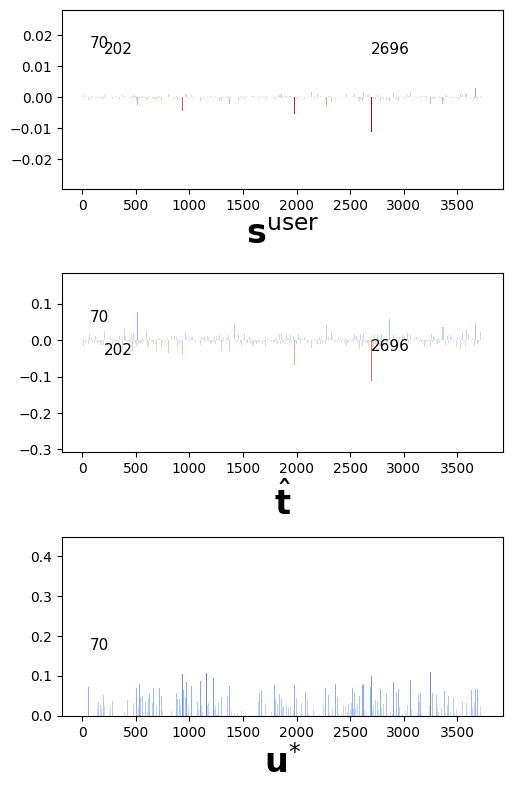

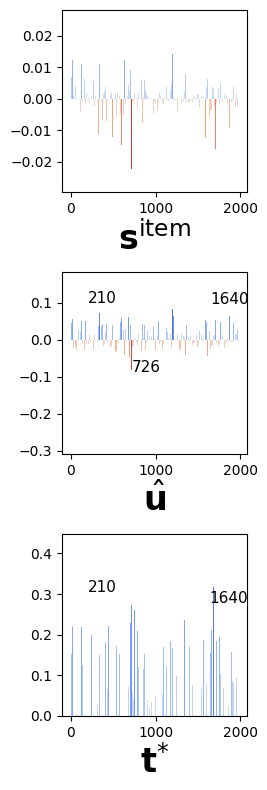

In [ ]:
# 重みの可視化
weight_visualization(u_sim_mtx=user_embeddings_flattened, u_proj=u_proj_flattened, i_sim_mtx=item_embeddings_flattened, i_proj=i_proj_flattened, annotate_top_k=3)

In [ ]:
print(user_embeddings.shape)
print(u_proj.shape)
print(item_embeddings.shape)
print(i_proj.shape)

(68, 55)
(36, 55)
(36, 55)
(68, 55)


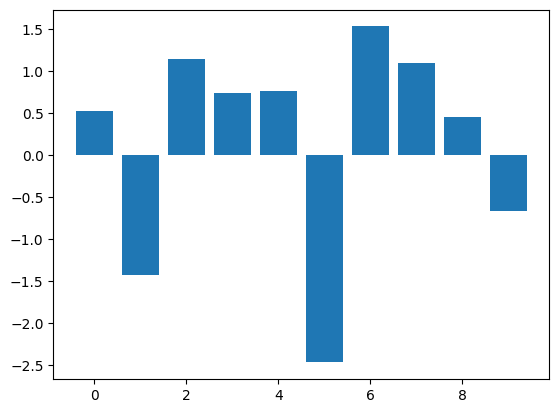

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# シンプルなデータを用意
data = np.random.randn(10)

# プロット
plt.bar(range(len(data)), data)
plt.show()
